In [7]:
import pyneuralnet as nn
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
np.random.seed(123)

In [8]:
# Load training data
class Data(nn.abstract.DataSource):
    def __init__(self):
        super().__init__()
        self.TRAIN_IN, self.TRAIN_OUT = pickle.load(open('data/mnist_preprocessed.pickle', 'rb'))
    
    def size(self):
        return len(self.TRAIN_IN)
    
    def sample(self, i):
        return (self.TRAIN_IN[i], self.TRAIN_IN[i])

data = Data()

loss = nn.loss.L2()

In [9]:
N = 10
a = 0.0001
AdamArgs = (0.9, 0.999)

In [10]:
model = nn.autoencoder.Sigmoid(784, 50)
trainer = nn.training.Trainer(model, data, loss)

Training of autoencoder complete in 0.4037848949432373 seconds per epoch.


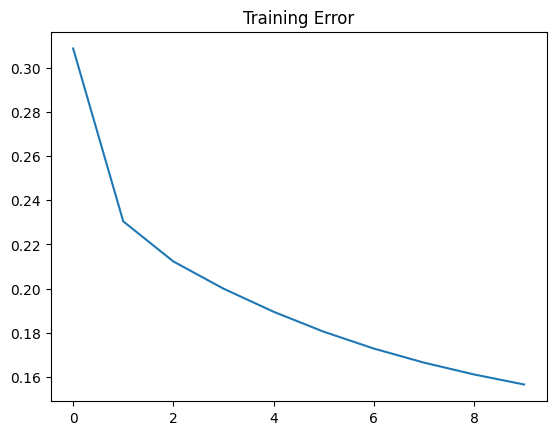

In [11]:
ts = time.time()
errors = trainer.train(N, a)
duration = time.time() - ts
print(f"Training of autoencoder complete in {duration / N} seconds per epoch.")

plt.title("Training Error")
plt.plot(range(len(errors)), errors)
plt.show()

In [12]:
import pickle

bts = pickle.dumps(model)
sour_model = pickle.loads(bts)
out1 = model.forward(data.sample(0)[0])
out2 = sour_model.forward(data.sample(0)[0])
diff = abs(out1 - out2)
print(f"{np.min(diff)} - {np.mean(diff)} - {np.max(diff)}")


0.0 - 0.0 - 0.0
